# Numerical solution of differential equations: Euler method

In this lecture, we are going to cover an alternate method for solving Q1 of tutorial 6.


## Mass/volume balance

Performing a mass balance, we can obtain a differential equation that governs how the liquid height $h$ in the tank varies with time:
$$
\begin{align*}
\frac{dh}{dt}
&=
\frac{\dot{V}_{\rm in}}{A}
- \frac{v A_0}{A}
\end{align*}
$$
where $A$ is the cross-sectional area of the tank, $\dot{V}_{\rm in}$ is the volumetric flowrate of liquid into the tank, $v=\sqrt{2gh}$ is the velocity of fluid exiting the tank through a valve, $A_0$ is the cross-sectional area of the valve, and $g=9.81\,{\rm m\,s^{-2}}$ is the acceleration due to gravity.


$$
\begin{align*}
\frac{h(t+\Delta t)-h(t)}{\Delta t}
&\approx
\frac{\dot{V}_{\rm in}}{A}
- \frac{v A_0}{A}
\\
h(t+\Delta t)
&\approx
h(t) + \left(
\frac{\dot{V}_{\rm in}}{A}
- \frac{v A_0}{A}
\right) \Delta t
\end{align*}
$$


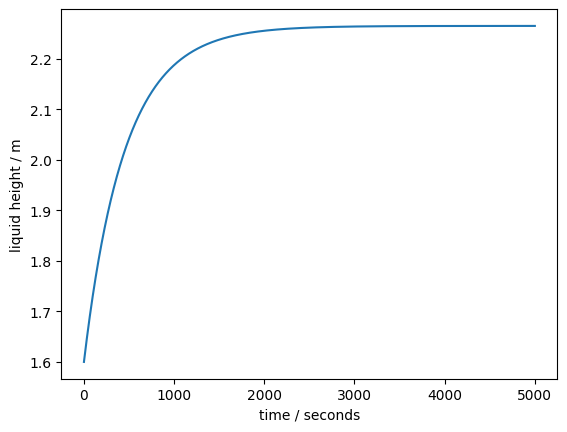

In [ ]:
import numpy as np

D = 1.5                 # m, diameter of the tank
A = np.pi * D**2/4      # m^2, cross-sectional area of the tank
g = 9.81                # m s^{-2}, acceleration due to gravity
A0 = 25/100**2          # m^2, cross-sectional area of the valve
Vin = 1000 / 1000 / 60  # m^3 s^{-1}, this is the volumetric flowrate of liquid into the tank.
h0 = 1.6                # m, this is the initial liquid height in the tank

dt = 0.1  # s, time step

nsteps = 50000
t_list = []
h_list = []
t_old = 0    # initial time
h_old = h0   # initial liquid height
for step in range(nsteps):
  v = np.sqrt(2*g*h_old)

  t_new = t_old + dt
  h_new = h_old + (Vin/A-v*A0/A) * dt

  h_list.append(h_old)
  t_list.append(t_old)

  t_old = t_new
  h_old = h_new

#print(h_list)



import pylab as plt

plt.plot(t_list, h_list)

plt.xlabel('time / seconds')
plt.ylabel('liquid height / m')

plt.show()





We can make this problem slightly more complex by letting the inlet flowrate of liquid be time dependent.  Let's choose:
$$
\begin{align*}
\dot{V}_{\rm in}(t)
&= \dot{V}_{\rm in, 0} (1 + \cos \omega t)
\end{align*}
$$
where $\dot{V}_{\rm in, 0}=1000\,{\rm L\,min^{-1}}$, and $\omega=0.01\,{\rm s^{-1}}$.

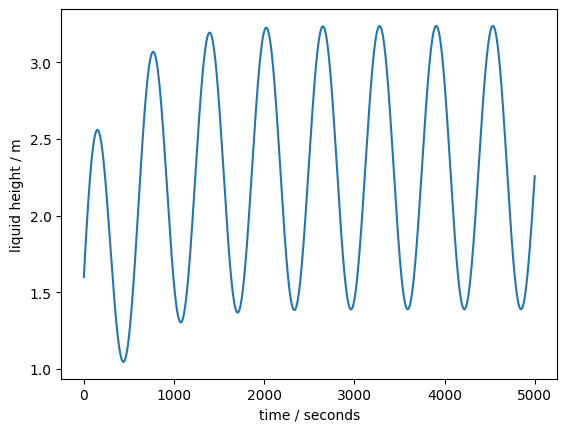

In [ ]:
import numpy as np

D = 1.5                  # m, diameter of the tank
A = np.pi * D**2/4       # m^2, cross-sectional area of the tank
g = 9.81                 # m s^{-2}, acceleration due to gravity
A0 = 25/100**2           # m^2, cross-sectional area of the valve
Vin0 = 1000 / 1000 / 60  # m^3 s^{-1}, this is the volumetric flowrate of liquid into the tank.
h0 = 1.6                 # m, this is the initial liquid height in the tank
omega = 0.01             # s^{-1}

dt = 0.1  # s, time step

nsteps = 50000
h_list = []
t_list = []
h_old = h0
t_old = 0
for step in range(nsteps):
  v = np.sqrt(2*g*h_old)
  Vin = Vin0 * (1.0 + np.cos(omega*t_old))  # this makes the inlet liquid flowrate depend on time
  t_new = t_old + dt
  h_new = h_old + (Vin/A-v*A0/A) * dt

  h_list.append(h_old)
  t_list.append(t_old)

  t_old = t_new
  h_old = h_new



import pylab as plt

plt.plot(t_list, h_list)

plt.xlabel('time / seconds')
plt.ylabel('liquid height / m')

plt.show()


## Energy balance

We can easily expand our numerical method to include other differential equations

From an energy balance, we have
$$
\begin{align*}
\frac{dT}{dt}
&=
\frac{\dot{V}_{\rm in} (T_{\rm in} - T)}{h(t) A}
\end{align*}
$$

We can use the Euler method to approximately solve this differential equation as:
$$
\begin{align*}
\frac{T(t+\Delta t)-T(t)}{\Delta t}
&\approx
\frac{\dot{V}_{\rm in} (T_{\rm in} - T(t))}{h(t) A}
\\
T(t+\Delta t)
&\approx
T(t)
+
\left[
\frac{\dot{V}_{\rm in} (T_{\rm in} - T(t))}{h(t) A}
\right] \Delta t
\end{align*}
$$

Below is some code that implements the solution of this differential equation alongside the previous one we obtained from the mass/volume balance:

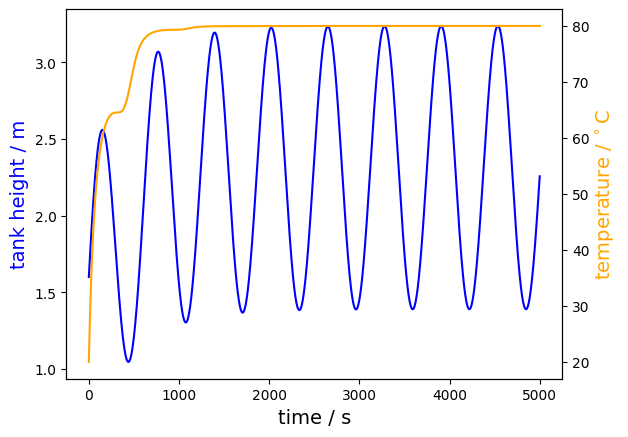

In [ ]:
import numpy as np

D = 1.5                  # m, diameter of the tank
A = np.pi * D**2/4       # m^2, cross-sectional area of the tank
g = 9.81                 # m s^{-2}, acceleration due to gravity
A0 = 25/100**2           # m^2, cross-sectional area of the valve
Vin0 = 1000 / 1000 / 60  # m^3 s^{-1}, this is the volumetric flowrate of liquid into the tank.
h0 = 1.6                 # m, this is the initial liquid height in the tank
omega = 0.01             # s^{-1}
Tin = 80                 # C, inlet fluid temperature
T0 = 20                  # C, initial fluid temperature
dt = 0.1                 # s, time step

nsteps = 50000
t_list = []
h_list = []
T_list = []

t_old = 0
h_old = h0
T_old = T0
for step in range(nsteps):
  v = np.sqrt(2*g*h_old)
  Vin = Vin0 * (1.0 + np.cos(omega*t_old))
  t_new = t_old + dt
  h_new = h_old + (Vin/A-v*A0/A) * dt
  T_new = T_old + Vin*(Tin-T_old)/(h_old*A) * dt

  t_list.append(t_old)
  h_list.append(h_old)
  T_list.append(T_old)

  t_old = t_new
  h_old = h_new
  T_old = T_new




import pylab as plt

fig, ax_h = plt.subplots()
ax_T = ax_h.twinx()

ax_h.plot(t_list, h_list, color='blue')
ax_h.set_ylabel(r'tank height / m',color="blue",fontsize=14)

ax_T.plot(t_list, T_list, color='orange')
ax_T.set_ylabel(r'temperature / $^\circ$C',color="orange",fontsize=14)


ax_h.set_xlabel('time / s', fontsize=14)


plt.show()


We don't need to write our own numerical routine every time we want to solve a set of differential equations.  There are many routines that are available on the internet.  One example is the function [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) from the `scipy` library.  A sample code that uses `solve_ivp` to solve our differential equations for the tank drainage problem is given below:

<ipython-input-32-bb2310a660ca>:19: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(2*g*h)


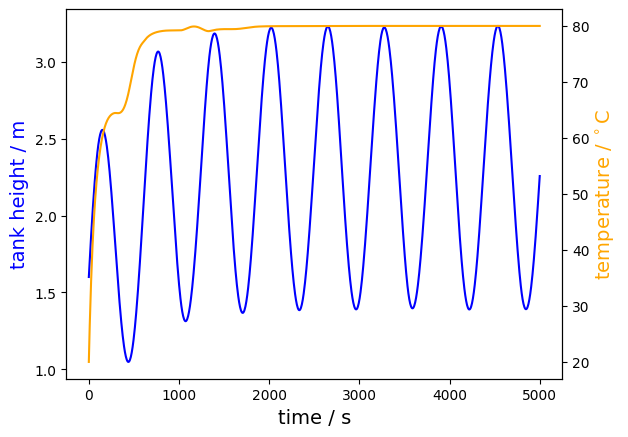

In [ ]:
import numpy as np

D = 1.5                  # m, diameter of the tank
A = np.pi * D**2/4       # m^2, cross-sectional area of the tank
g = 9.81                 # m s^{-2}, acceleration due to gravity
A0 = 25/100**2           # m^2, cross-sectional area of the valve
Vin0 = 1000 / 1000 / 60  # m^3 s^{-1}, this is the volumetric flowrate of liquid into the tank.
h0 = 1.6                 # m, this is the initial liquid height in the tank
omega = 0.01             # s^{-1}
Tin = 80                 # C, inlet fluid temperature
T0 = 20                  # C, initial fluid temperature


from scipy.integrate import solve_ivp

def res(t, y):
  h, T = y

  v = np.sqrt(2*g*h)
  Vin = Vin0 * (1.0 + np.cos(omega*t))

  dhdt = (Vin/A-v*A0/A)
  dTdt = Vin*(Tin-T)/(h*A)

  return [dhdt, dTdt]


t_list = np.linspace(0, 5000, 1000)
sol = solve_ivp(res, [0, 5000], [h0, T0], t_eval=t_list)


h_list = sol.y[0,:]
T_list = sol.y[1,:]


import pylab as plt

fig, ax_h = plt.subplots()
ax_T = ax_h.twinx()

ax_h.plot(t_list, h_list, color='blue')
ax_h.set_ylabel(r'tank height / m',color="blue",fontsize=14)

ax_T.plot(t_list, T_list, color='orange')
ax_T.set_ylabel(r'temperature / $^\circ$C',color="orange",fontsize=14)


ax_h.set_xlabel('time / s', fontsize=14)


plt.show()


Another function from the `scipy` library is [`odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).  This is a bit easier to use, and there are some nice websites with tutorials about how to use it (e.g., [here](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) and [here](https://www.geeksforgeeks.org/solve-differential-equations-with-odeint-function-of-scipy-module-in-python/)).  Below is some code to use `odeint` to solve our differential equations:

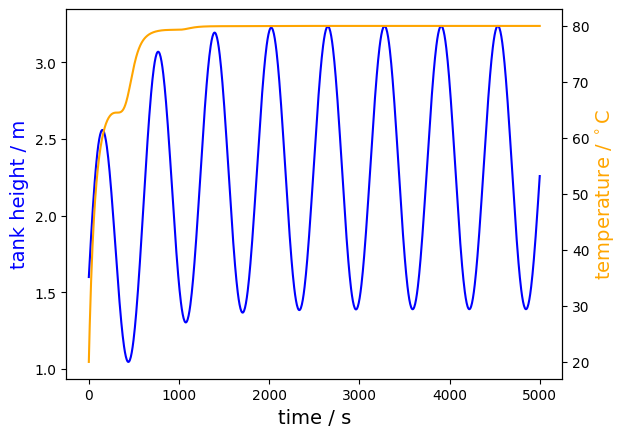

In [ ]:
import numpy as np

D = 1.5                  # m, diameter of the tank
A = np.pi * D**2/4       # m^2, cross-sectional area of the tank
g = 9.81                 # m s^{-2}, acceleration due to gravity
A0 = 25/100**2           # m^2, cross-sectional area of the valve
Vin0 = 1000 / 1000 / 60  # m^3 s^{-1}, this is the volumetric flowrate of liquid into the tank.
h0 = 1.6                 # m, this is the initial liquid height in the tank
omega = 0.01             # s^{-1}
Tin = 80                 # C, inlet fluid temperature
T0 = 20                  # C, initial fluid temperature




from scipy.integrate import odeint

def res(y, t):
  h, T = y
  v = np.sqrt(2*g*h)
  Vin = Vin0 * (1.0 + np.cos(omega*t))
  dhdt = (Vin/A-v*A0/A)
  dTdt = Vin*(Tin-T)/(h*A)
  return [dhdt, dTdt]

t_list = np.linspace(0, 5000, 1000)
sol = odeint(res, [h0, T0], t_list)

h_list = sol[:,0]
T_list = sol[:,1]



import pylab as plt

fig, ax_h = plt.subplots()
ax_T = ax_h.twinx()

ax_h.plot(t_list, h_list, color='blue')
ax_h.set_ylabel(r'tank height / m',color="blue",fontsize=14)

ax_T.plot(t_list, T_list, color='orange')
ax_T.set_ylabel(r'temperature / $^\circ$C',color="orange",fontsize=14)


ax_h.set_xlabel('time / s', fontsize=14)


plt.show()